In [1]:
# env : Aria-env used 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Terms to know for Audio in Digital Form:


### 1. **Sampling Rate (Sample Rate)**
- **Definition**: The number of samples of audio taken per second when converting an analog signal to a digital one.
- **Measured in**: Hertz (Hz) or Kilohertz (kHz).
- **Example**: A common sample rate is 44.1 kHz, meaning 44,100 samples per second.

### 2. **Bit Depth**
- **Definition**: The number of bits used to represent each audio sample, which determines the resolution or dynamic range of the sound.
- **Measured in**: Bits (e.g., 16-bit, 24-bit).
- **Example**: CD-quality audio uses 16-bit depth, while higher-quality audio uses 24-bit or even 32-bit.

### 3. **Dynamic Range**
- **Definition**: The range between the softest and loudest sound that an audio system can capture or reproduce.
- **Measured in**: Decibels (dB).
- **Example**: A higher dynamic range (e.g., 96 dB) means more detailed sound, allowing for more nuanced quiet and loud passages.

### 4. **Nyquist Theorem**
- **Definition**: A fundamental principle that states the sampling rate must be at least twice the highest frequency in the audio signal to avoid aliasing.
- **Example**: For audio signals with frequencies up to 20 kHz (the limit of human hearing), the sample rate must be at least 40 kHz.

### 5. **Aliasing**
- **Definition**: An artifact that occurs when a signal is undersampled, causing high-frequency components to be misrepresented as lower frequencies.
- **Solution**: Use an appropriate sampling rate (guided by the Nyquist Theorem) and anti-aliasing filters.

### 6. **Quantization**
- **Definition**: The process of mapping continuous amplitude values of an analog signal to discrete levels in digital audio.
- **Impact**: The higher the bit depth, the more levels available for quantization, reducing distortion or noise.

### 7. **Compression**
- **Definition**: A process that reduces the file size of digital audio by eliminating redundancy or less important information.
- **Types**:
  - **Lossy Compression**: Reduces file size by removing some data, potentially affecting audio quality (e.g., MP3, AAC).
  - **Lossless Compression**: Reduces file size without losing any audio information (e.g., FLAC, ALAC).

### 8. **Bit Rate**
- **Definition**: The number of bits processed per second in an audio file.
- **Measured in**: Kilobits per second (kbps).
- **Example**: An MP3 file might have a bit rate of 128 kbps, 256 kbps, or 320 kbps. Higher bit rates typically mean better sound quality but larger file sizes.

### 9. **PCM (Pulse Code Modulation)**
- **Definition**: A method used to digitally represent analog signals, where the amplitude of the analog signal is sampled at regular intervals and then quantized.
- **Usage**: This is the standard form of digital audio in computers and CDs.

### 10. **WAV and AIFF**
- **Definition**: Uncompressed audio file formats. WAV is widely used on Windows systems, while AIFF is common on macOS.
- **Characteristics**: These formats retain all original audio data, resulting in high quality but large file sizes.

### 11. **Frequency**
- **Definition**: The number of vibrations or cycles per second of a sound wave.
- **Measured in**: Hertz (Hz).
- **Example**: The human hearing range typically spans from 20 Hz (low bass) to 20 kHz (high treble).

### 12. **Amplitude**
- **Definition**: The strength or intensity of a sound wave, which determines its loudness.
- **Measured in**: Decibels (dB).

### 13. **Spectral Content**
- **Definition**: Refers to the range of frequencies present in a sound or signal.
- **Application**: Helps in analyzing the timbre or tonal quality of audio.

### 14. **Latency**
- **Definition**: The delay between inputting an audio signal and hearing the output, which is critical in live audio processing and production.
- **Factors**: It can be caused by processing speed, buffer settings, and hardware limitations.

### 15. **FFT (Fast Fourier Transform)**
- **Definition**: An algorithm that transforms a signal from its time domain to its frequency domain.
- **Use**: Essential for analyzing the frequency content of audio signals and is used in creating spectrograms.

### 16. **Normalization**
- **Definition**: The process of adjusting the gain of an audio signal so that the loudest peak reaches a specified level, often 0 dBFS (full scale).
- **Purpose**: Ensures consistent volume across different audio files.

### 17. **dBFS (Decibels Full Scale)**
- **Definition**: A unit of measurement for amplitude levels in digital audio, where 0 dBFS represents the maximum possible level.
- **Impact**: Exceeding 0 dBFS can cause clipping, resulting in distortion.

### 18. **Clipping**
- **Definition**: A form of distortion that occurs when an audio signal exceeds the maximum level a system can handle, causing the signal to "clip" or truncate.
- **Solution**: Use proper gain staging and avoid boosting signals beyond their limit.

### 19. **Envelope**
- **Definition**: Describes how a sound evolves over time in terms of amplitude, typically broken down into attack, decay, sustain, and release (ADSR).
- **Application**: Important in audio synthesis and music production.

### 20. **Reverb**
- **Definition**: A reflection of sound that creates an echo-like effect, making audio sound as though it's in a physical space.
- **Use**: Adds depth and atmosphere to audio recordings.


# Reading audio file

In [2]:
audio_files = glob('archive/*/*.wav')

In [3]:
# Play audio file
ipd.Audio(audio_files[0])

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
shape y: (72838,)
sr: 22050


<Axes: >

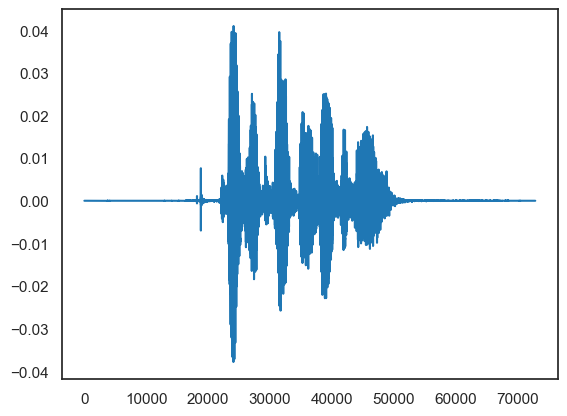

In [5]:
pd.Series(y).plot()

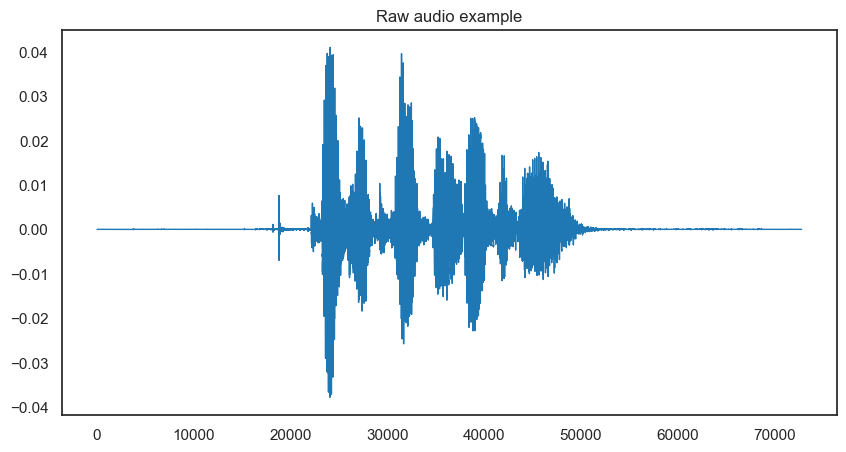

In [6]:
pd.Series(y).plot(figsize=(10, 5),
                 lw=1,
                 title="Raw audio example",
                 color=color_pal[0])
plt.show()

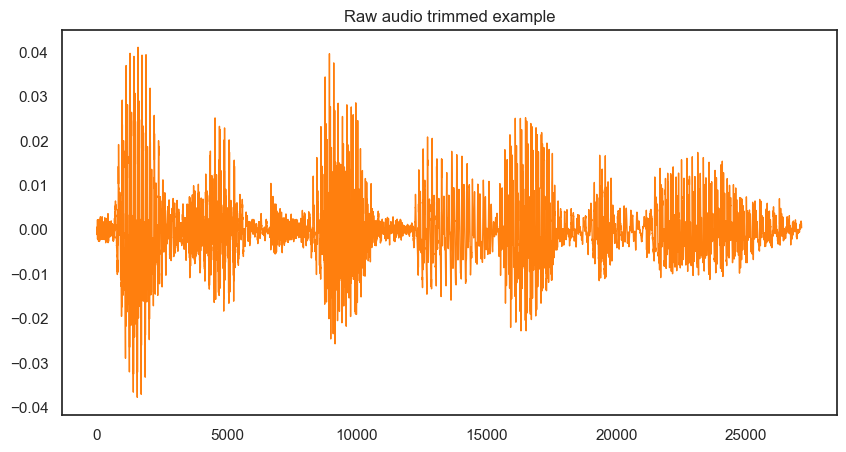

In [7]:
# Trimming leadinig/ lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5),
                         lw=1,
                         title="Raw audio trimmed example",
                         color=color_pal[1])
plt.show()

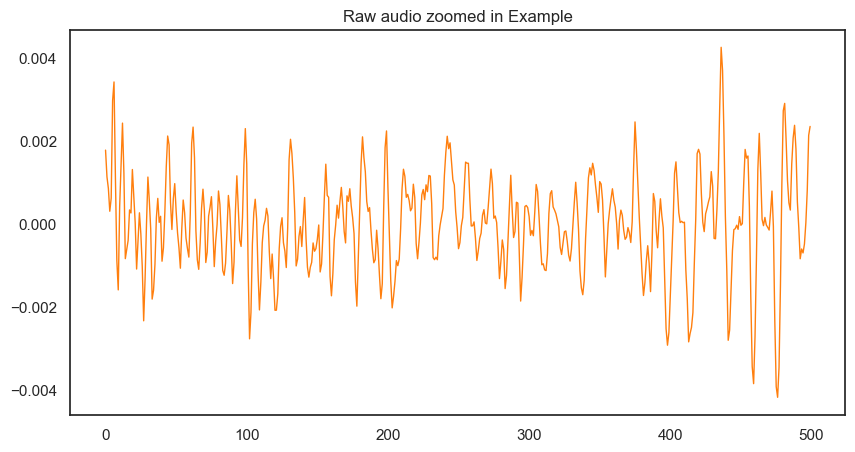

In [8]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                              lw=1,
                              title="Raw audio zoomed in Example",
                              color=color_pal[1])
plt.show()

# Spectogram

## A spectrogram is a visual representation of the spectrum of frequencies in a signal as it varies over time. It is commonly used in audio analysis and signal processing to show how the frequency content of a sound or signal changes over a given period. The spectrogram is essentially a graph where:

- X-axis represents time,
- Y-axis represents frequency, and
- Color intensity (or shading) represents the amplitude (or power) of each frequency at a given moment in time.
Brighter areas (or warmer colors) in the spectrogram indicate higher amplitude (louder sounds), while darker areas (or cooler colors) represent lower amplitude (quieter sounds).

How Spectrograms Are Generated
Spectrograms are typically generated using a Fourier Transform, particularly a Short-Time Fourier Transform (STFT), which divides the signal into small segments and computes the frequency content for each segment. This method helps in visualizing how the signal's frequency spectrum evolves over time.

Applications of Spectrograms
Audio Analysis: Used to visualize sound, music, or speech for research or processing, such as identifying patterns or detecting issues.
Speech Recognition: Helpful in distinguishing phonemes and understanding speech dynamics.
Medical Imaging: Used in fields like EEG or MRI to analyze brain wave frequencies or other signals.
Birdsong or Animal Sound Analysis: Scientists use spectrograms to study the frequency patterns of animal vocalizations.
Seismology: To analyze seismic wave frequencies and detect patterns in earthquakes.

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 143)

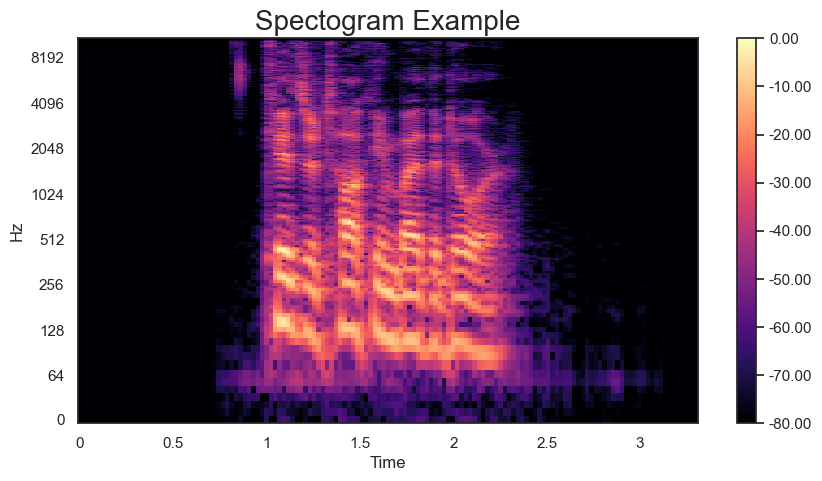

In [10]:
# Plot the  transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax = ax)
ax.set_title('Spectogram Example', fontsize = 20)
fig.colorbar(img, ax =ax, format = f'%0.2f')
plt.show()

# Mel Spectogram 

In [18]:
S = librosa.feature.melspectrogram(y = y,
                                  sr = sr,
                                  n_mels = 128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref = np.max)

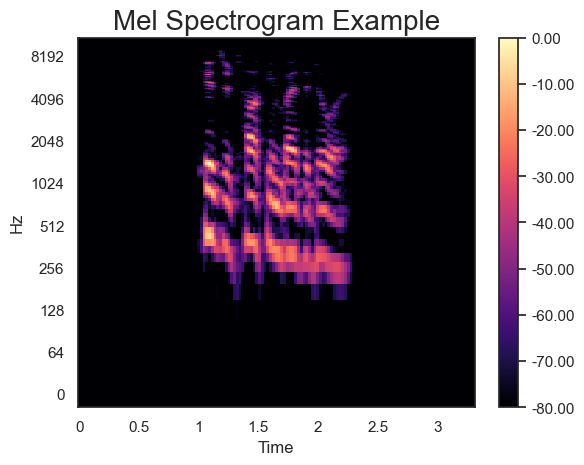

In [21]:
# fig, ax = plt.subplots(10, 5)
# # Plot mel spectrogram
# img = librosa.display.specshow(S_db_mel,
#                               x_axis= 'time',
#                               y_axis= 'log',
#                               ax = ax)
# ax.set_title("Mel Spectrogram Example", fontsize = 20)
# fig.colorbar(img, ax = ax,  format = f'%0.2f')
# plt.show()
fig, ax = plt.subplots()  # No grid, just a single plot
# Plot mel spectrogram
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title("Mel Spectrogram Example", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')